Lo siguiente está basado en [R: Un lenguaje para análisis de datos por E. B. Zamudio](http://allman.rhon.itam.mx/~ebarrios/docs/porqueR.pdf), el prefacio y capítulo 1 de M.D. Ugarte, A. F. Militino, A. T. Arnholt, Probability and Statistics with R y [R-intro](https://cran.r-project.org/doc/manuals/R-intro.html)

# Información general

R es un lenguaje de programación basado en *S* el cual es un lenguaje y un ambiente de programación interactiva para el análisis de datos y graficación desarrollado por los *Bell laboratories* por Rick Becker, John Chambers y Allan Wilks. Dos dialectos del lenguaje S existen: *R* una implementación *open source* disponible en [r-project](http://www.r-project.org) y *S-PLUS* una implementación comercial. R es el resultado de esfuerzos de todo el mundo y fue escrito inicialmente por Robert Gentleman y Ross Ihaka del departamento de Estadística de la Universidad de Auckland

R es: un lenguaje y ambiente para cómputo estadístico y graficación. El término *ambiente* lo caracteriza como un sistema completamente planeado y coherente en el que técnicas estadísticas clásicas y modernas han sido implementadas. Algunas forman parte de *R* las llamadas *built-in* pero otras se proveen vía *packages*. Alrededor de *25* packages son incluídas con la instalación de R (*standard* & *recommended*) y muchas más se encuentran disponibles en [CRAN family of Internet sites: Contributed Packages](https://cran.r-project.org/web/packages/index.html)

El ambiente de R contiene software que permite la manipulación de datos, cálculos y visualización de gráficos y tiene:

* programas para almacenamiento y manejo de datos.
* una gamma amplia de operadores para cálculos en arreglos, en particular matrices.
* una gran colección de herramientas intermedias correctamente integradas para análisis de datos.
* lenguaje de programación *S* para *loops*, funciones definidas por users y desarrollo para I/O.


*R* es un vehículo para desarrollo de nuevos métodos de análisis de datos de forma interactiva y se extiende por medio de paquetes.

## Diferencia entre S y R?

(extraído de [R-intro: 1.3 R and statistics](https://cran.r-project.org/doc/manuals/R-intro.html)) "There is an important difference in philosophy between S (and hence R) and the other main statistical systems. In S a statistical analysis is normally done as a series of steps, with intermediate results being stored in objects. Thus whereas SAS and SPSS will give copious output from a regression or discriminant analysis, R will give minimal output and store the results in a fit object for subsequent interrogation by further R functions."

## Características de S 

(extraído de [R: Un lenguaje para análisis de datos por E. B. Zamudio](http://allman.rhon.itam.mx/~ebarrios/docs/porqueR.pdf))

* *S* es sobre datos: provee de herramientas generales y fáciles de usar para la organización, almacenamiento y recuperación de varios tipos de datos.

* *S* es sobre análisis: es decir, cálculos necesarios para entender los datos. *S* provee de métodos numéricos y otras técnicas computacionales.

* *S* es sobre programación: usted puede programar funciones en el mismo lenguaje *S* aprovechando su poder y simplicidad. Si es necesario el lenguaje ofrece  interfaces  sencillas  para  comunicación  con  el  sistema  operativo  o rutinas en C y Fortran.

* Especialmente, *S* es sobregraficación: ver a los datos de maneras interactivas, informativas y flexibles. Las capacidades de *S* están diseñadas para motivar la creación de nuevas herramientas e intentar nuevas ideas.


In [1]:
?base

base-package {base},R Documentation


In [2]:
library(help = 'base')

Documentation for package 'base'


		Information on package 'base'

Description:

Package:       base
Version:       3.6.0
Priority:      base
Title:         The R Base Package
Author:        R Core Team and contributors worldwide
Maintainer:    R Core Team <R-core@r-project.org>
Description:   Base R functions.
License:       Part of R 3.6.0
Suggests:      methods
Built:         R 3.6.0; ; 2019-05-13 01:04:01 UTC; unix

Index:

.Call                   Modern Interfaces to C/C++ code
.Device                 Lists of Open/Active Graphics Devices
.Internal               Call an Internal Function
.Last.value             Value of Last Evaluated Expression
.Library                Search Paths for Packages
.Machine                Numerical Characteristics of the Machine
.Platform               Platform Specific Variables
.Primitive              Look Up a Primitive Function
.bincode                Bin a Numeric Vector
.deparseOpts            Options for Expression Deparsing
.onLoad           


plot> require(stats) # for lowess, rpois, rnorm

plot> plot(cars)

plot> lines(lowess(cars))

plot> plot(sin, -pi, 2*pi) # see ?plot.function


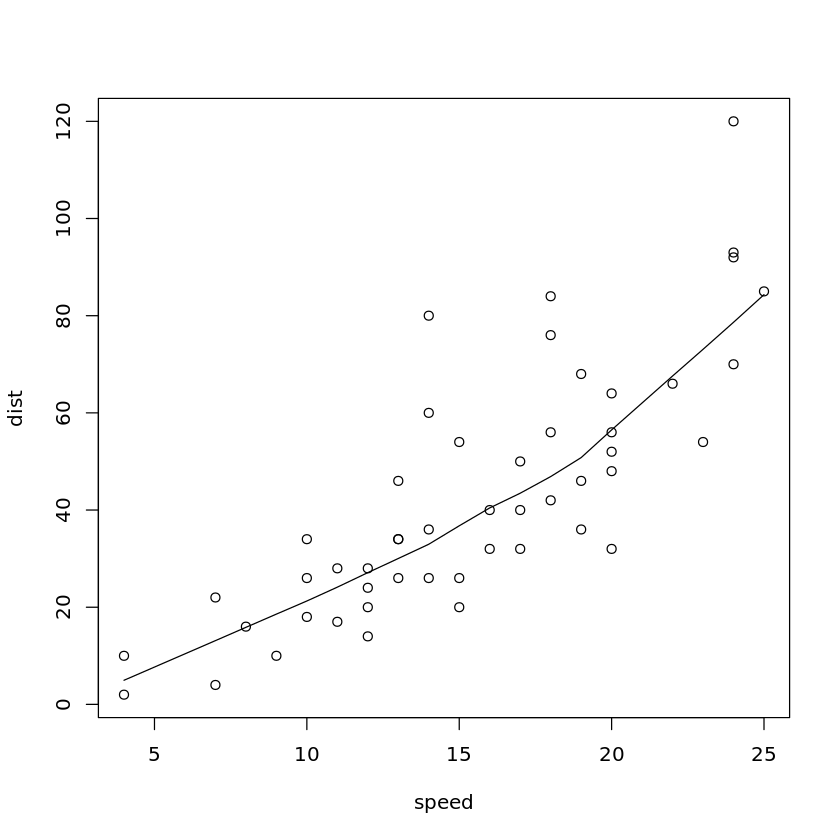


plot> ## Discrete Distribution Plot:
plot> plot(table(rpois(100, 5)), type = "h", col = "red", lwd = 10,
plot+      main = "rpois(100, lambda = 5)")


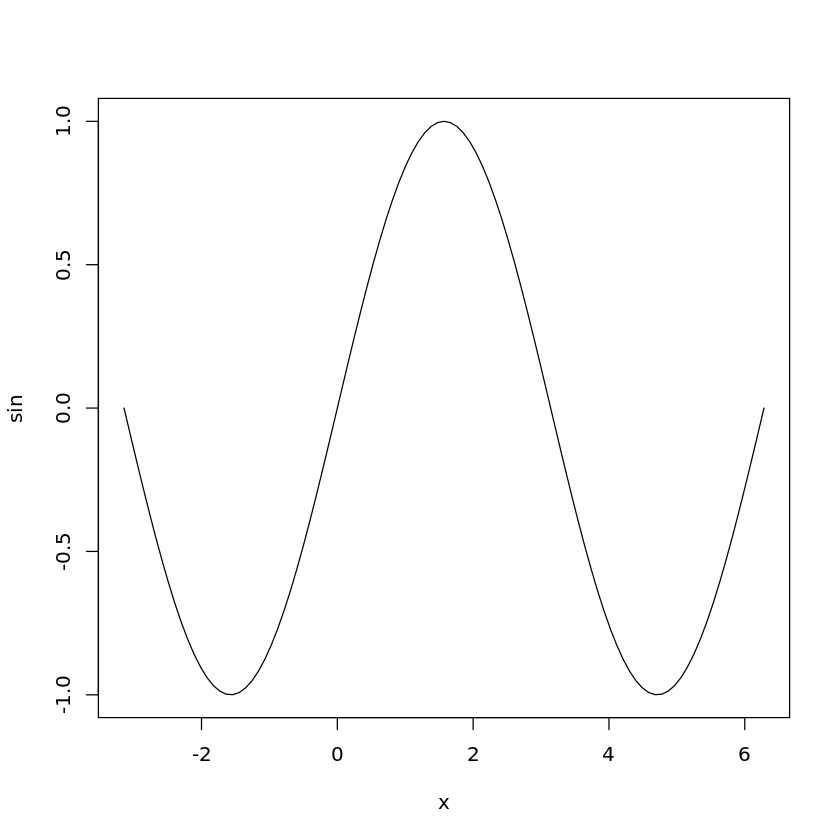


plot> ## Simple quantiles/ECDF, see ecdf() {library(stats)} for a better one:
plot> plot(x <- sort(rnorm(47)), type = "s", main = "plot(x, type = \"s\")")


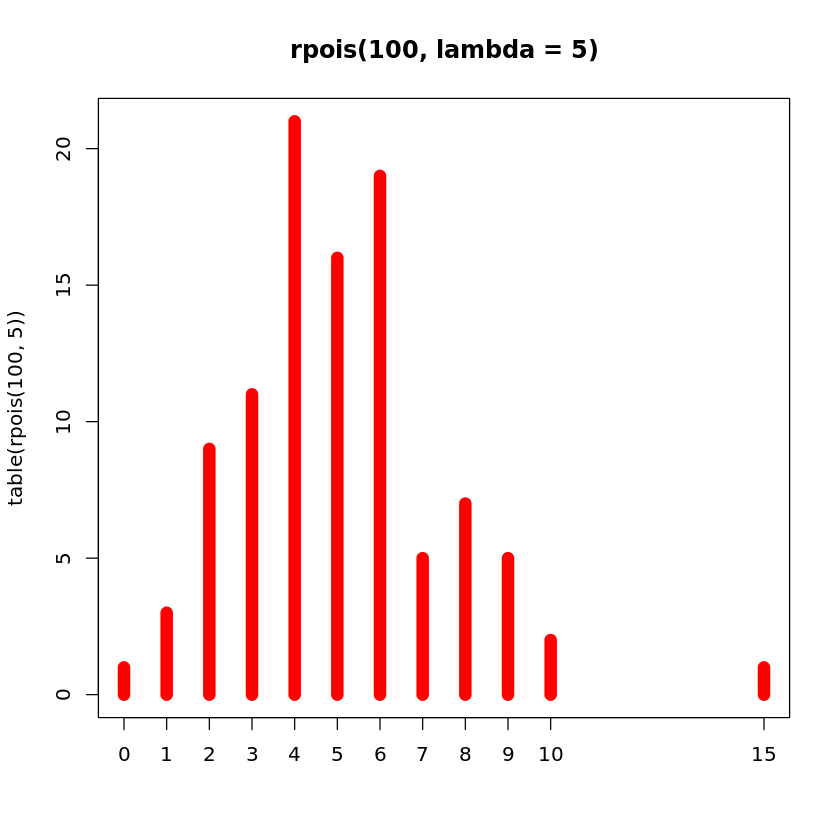


plot> points(x, cex = .5, col = "dark red")


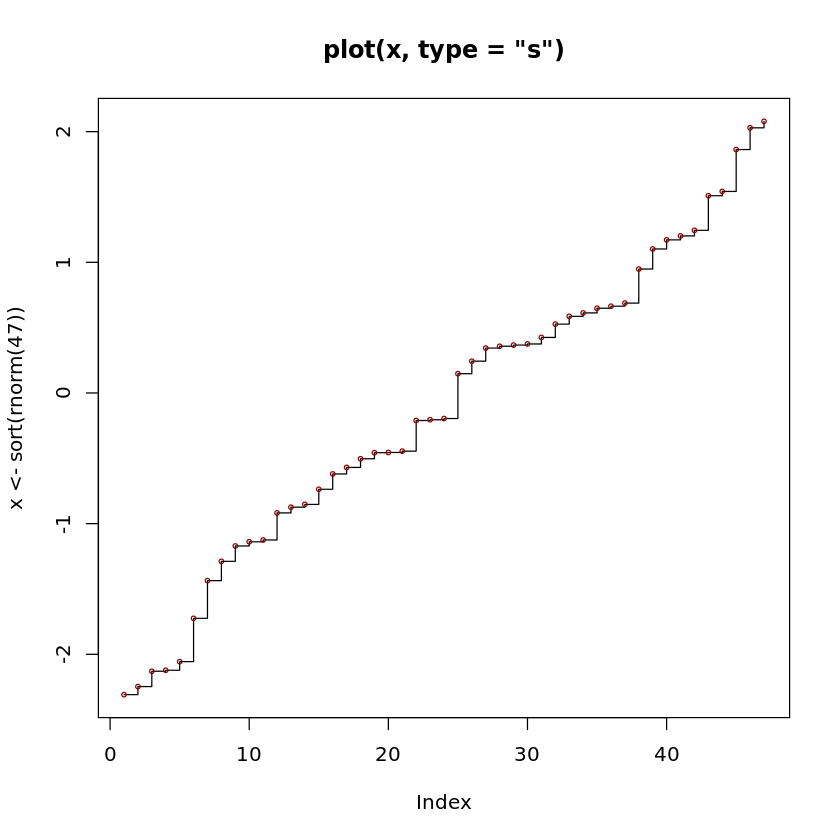

In [6]:
example(plot)

In [7]:
?cars

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data")
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1, log = "xy")
     title(main = "cars data (logarithmic scales)")
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     summary(fm1 <- lm(log(dist) ~ log(speed), data = cars))
     opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
                 mar = c(4.1, 4.1, 2.1, 1.1))
     plot(fm1)
     par(opar)
     
     ## An example of polynomial regression
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
         las = 1, xlim = c(0, 25))
     d <- seq(0, 25, length.out = 200)
     for(degree in 1:4) {
       fm <- lm(dist ~ poly(speed, degree), data = cars)
       assign(paste("cars", degree, sep = "."), fm)
       lines(d, predict(fm, data.frame(speed = d)), col = degree)
     }
     anova(cars.1, cars.2, cars.3, cars.4)